# Sales Analysis

Import Necessary Libraries

In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell




Merge the 12 months of sales data into a single CSV file

In [3]:
df=pd.read_csv("./Sales_Data/Sales_September_2019.csv")

all_months_data = pd.DataFrame()


files = [file for file in os.listdir('./Sales_Data')]
for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    all_months_data= pd.concat([all_months_data,df], ignore_index=True)

all_months_data.to_csv("all_dataSales.csv",index=False)



Read in Updated Dataframe

Corrections for questions 1


In [4]:
all_data = pd.read_csv("all_dataSales.csv")
#creo un dataframe para ver cuales filas tienen nan
nan= all_data[all_data.isna().any(axis=1)]
nan.head()
#elimino las filas donde todos los valores son nan
all_data= all_data.dropna(how='all')

# Como hay valores en la fecha donde sale Or y por ende no puedo convertirlo en numero
# por ende dejare unicamente en el data frame las filas con valores de fecha validos
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
# necesito convertir en numero los valores de cantidad y precio para poder calcular las ventas
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int64')
all_data['Price Each'] = all_data['Price Each'].astype('float')

Corrections for question 2

 

In [5]:
#necesitamos la ciudad y el estado por ende, hay que separarla de la columna de direccion
def extraer_ciudad(direccion):
    return direccion.split(',')[1]
def extraer_estado(direccion):
    return direccion.split(',')[2].split(' ')[1]
#

Corretions for question 3

In [6]:
# necesitamos encontrar la hora en la cual se hacen mas ventas 
# por ende como ya convertimos previamente a un formato fecha/tiempo es facil obtener la hora


Add Month column

In [7]:
all_data['Month'] =  all_data['Order Date'].dt.month
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


Add a sales column

In [8]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99


add city column

In [9]:
all_data['cities']=all_data['Purchase Address'].apply(lambda x:f"{extraer_ciudad(x)} ({extraer_estado(x)})" )
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,cities
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


add hour column

In [10]:
all_data['Hour'] =  all_data['Order Date'].dt.hour
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,cities,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17


Question 1: What was the best month for sales? How much was earned that moth?

Answer the question

,Quantity Ordered,Sales
Month,,
1,10903,1822256.73
2,13449,2202022.42
3,17005,2807100.38
4,20558,3390670.24
5,18667,3152606.75
6,15253,2577802.26
7,16072,2647775.76
8,13448,2244467.88
9,13109,2097560.13


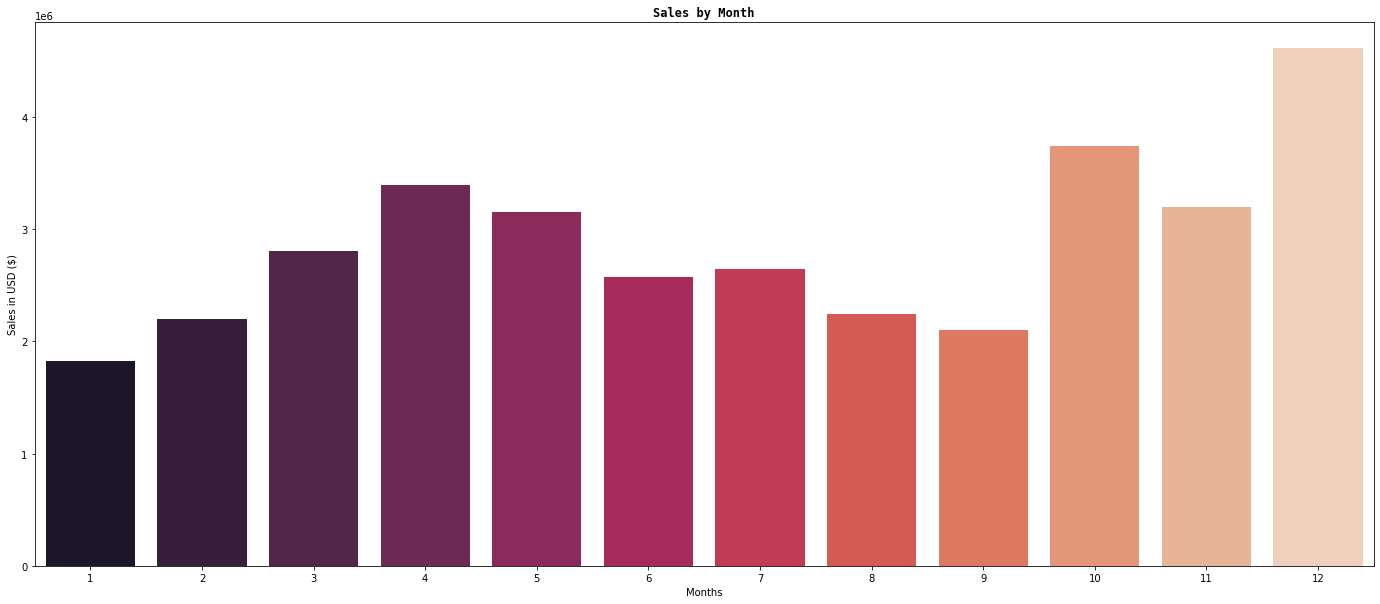

In [11]:
suma_ventas_mes = all_data.groupby('Month').sum().drop(['Price Each','Hour'],axis=1)

plt.figure(figsize=(24, 10))
sns.barplot(x = suma_ventas_mes.index, 
            y = suma_ventas_mes['Sales'], 
            data = suma_ventas_mes, palette = 'rocket')

plt.title('Sales by Month', fontname='monospace', weight='bold')
# x-label
plt.xlabel('Months')
# y-label
plt.ylabel('Sales in USD ($)');
suma_ventas_mes

The month with the higest sales of the year was december with a total of US $4613443.34 

Question 2: what city had the highest number of sales

,Quantity Ordered,Sales
cities,,
Atlanta (GA),16602,2795498.58
Austin (TX),11153,1819581.75
Boston (MA),22528,3661642.01
Dallas (TX),16730,2767975.40
Los Angeles (CA),33289,5452570.80
New York City (NY),27932,4664317.43
Portland (ME),2750,449758.27
Portland (OR),11303,1870732.34
San Francisco (CA),50239,8262203.91


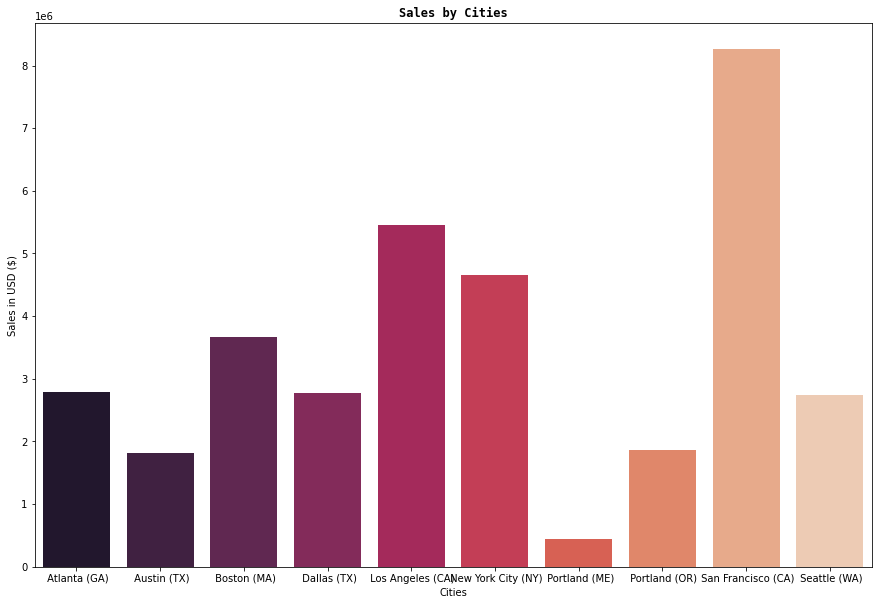

In [12]:
suma_ventas_ciudad = all_data.groupby('cities').sum().drop(['Price Each','Month','Hour'],axis=1)

plt.figure(figsize=(15, 10))
sns.barplot(x = suma_ventas_ciudad.index, 
            y = suma_ventas_ciudad['Sales'], 
            data = suma_ventas_ciudad, palette = 'rocket')

plt.title('Sales by Cities', fontname='monospace', weight='bold')
# x-label
plt.xlabel('Cities')
# y-label
plt.ylabel('Sales in USD ($)');
suma_ventas_ciudad

The city with the highest sales of the year was San francisco with a total of US $2747755.48

Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

,Quantity Ordered,Sales
Hour,,
0,4428,713721.27
1,2619,460866.88
2,1398,234851.44
3,928,145757.89
4,937,162661.01
5,1493,230679.82
6,2810,448113.00
7,4556,744854.12
8,7002,1192348.97


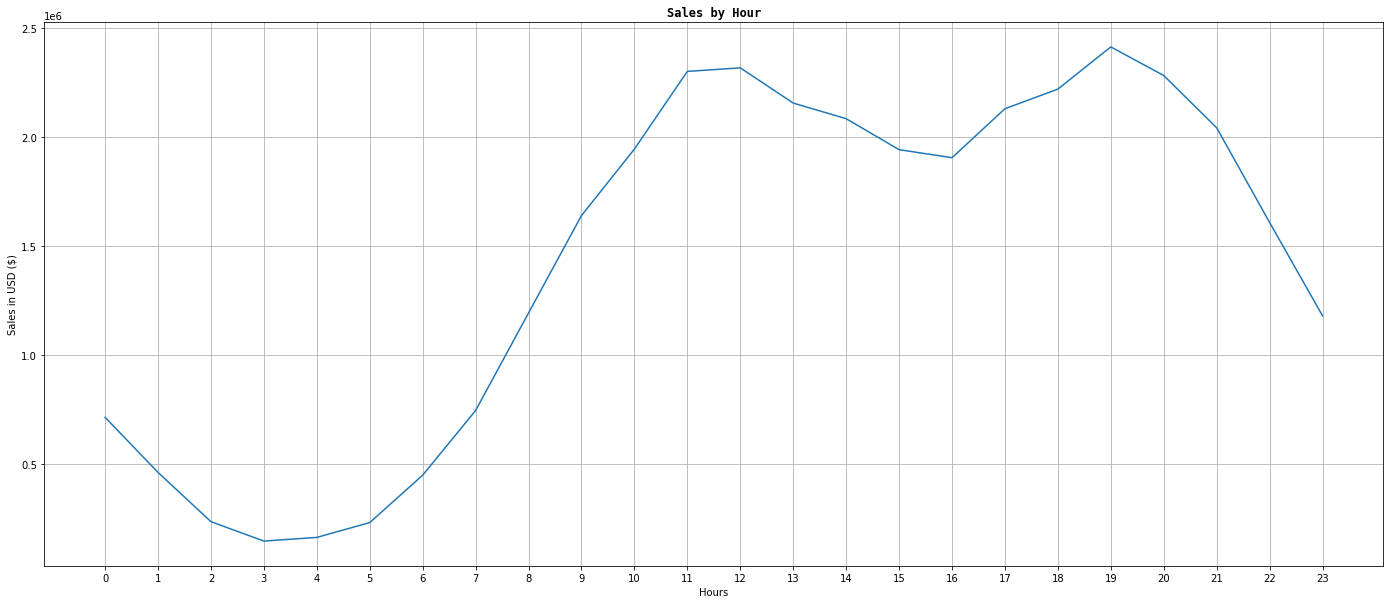

In [13]:
suma_ventas_hour = all_data.groupby('Hour').sum().drop(['Price Each','Month'],axis=1)
plt.figure(figsize=(24, 10))
sns.lineplot(
    data=suma_ventas_hour,
    x=suma_ventas_hour.index, y=suma_ventas_hour['Sales']
)
plt.title('Sales by Hour', fontname='monospace', weight='bold')
# x-label
plt.xlabel('Hours')
# y-label
plt.ylabel('Sales in USD ($)');
plt.grid()
plt.xticks(suma_ventas_hour.index)
suma_ventas_hour

The best hour to display advertisements to maximize likelihood of customer's buying product is at 19 or 7 pm 

Question 4: What products are most often sold together

In [14]:
# de esta manera saco es los combos que hay cuales son los que la gente lleva mas 
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df['combos']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df=df[['Order ID', 'combos']].drop_duplicates()
df1 = df.value_counts(['combos']).reset_index(name='counts')
df1.head(10)

C:\Users\juan\AppData\Local\Temp/ipykernel_18256/2454872764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['combos']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,combos,counts
0,"iPhone,Lightning Charging Cable",882
1,"Google Phone,USB-C Charging Cable",856
2,"iPhone,Wired Headphones",361
3,"Vareebadd Phone,USB-C Charging Cable",312
4,"Google Phone,Wired Headphones",303
5,"iPhone,Apple Airpods Headphones",286
6,"Google Phone,Bose SoundSport Headphones",161
7,"Vareebadd Phone,Wired Headphones",104
8,"Google Phone,USB-C Charging Cable,Wired Headph...",77
9,"Vareebadd Phone,Bose SoundSport Headphones",60


In [15]:
# de esta manera saco la pareja de productos que se llevan mas,
from itertools import combinations
from collections import Counter

count=Counter()

for row in df['combos']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key, value in count.most_common(10):
     print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Question 5: What product sold the most? Why do you think it sold the most?

In [16]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


,Product,Price Each,Quantity Ordered,Total
13,Macbook Pro Laptop,1700.00,4728,8037600.00
18,iPhone,700.00,6849,4794300.00
14,ThinkPad Laptop,999.99,4130,4129958.70
9,Google Phone,600.00,5532,3319200.00
1,27in 4K Gaming Monitor,389.99,6244,2435097.56
3,34in Ultrawide Monitor,379.99,6199,2355558.01
6,Apple Airpods Headphones,150.00,15661,2349150.00
8,Flatscreen TV,300.00,4819,1445700.00
7,Bose SoundSport Headphones,99.99,13457,1345565.43
2,27in FHD Monitor,149.99,7550,1132424.50


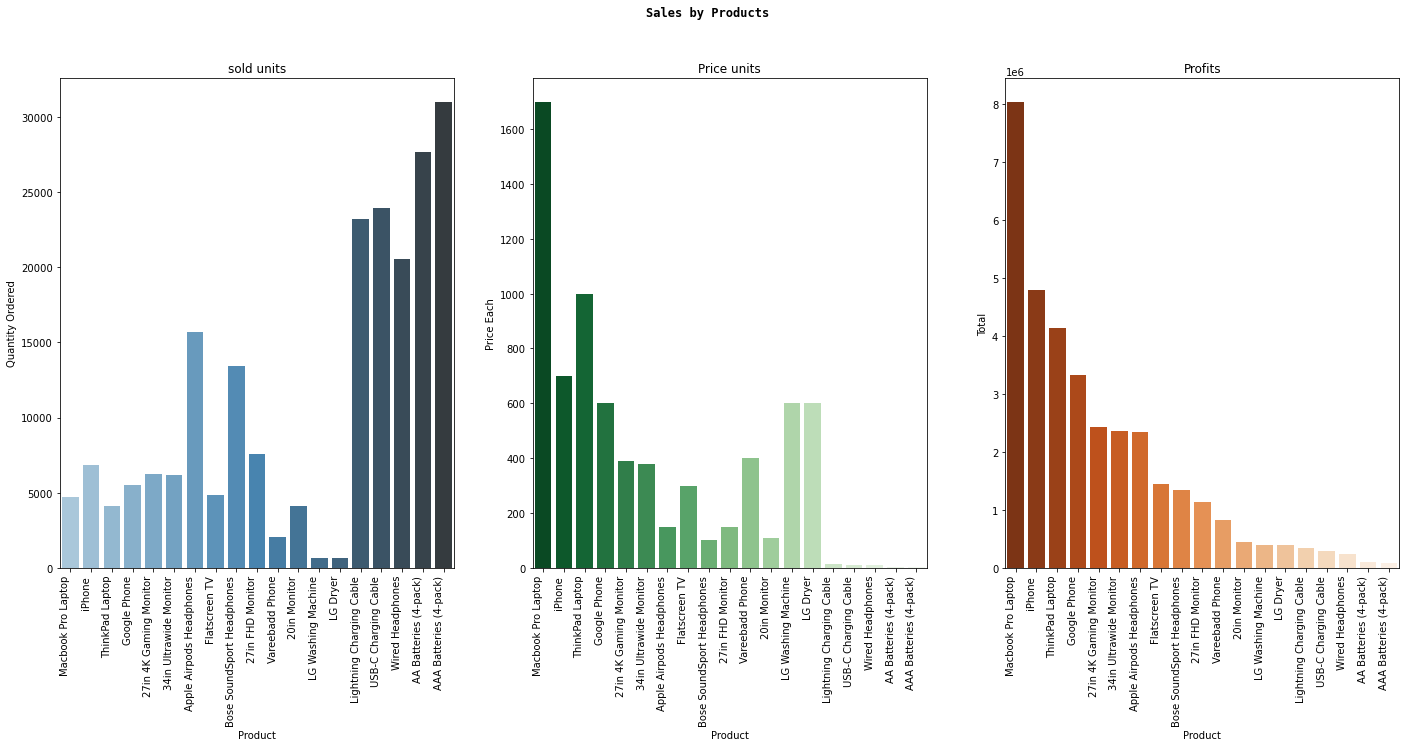

In [33]:
product= all_data.groupby('Product')['Quantity Ordered'].sum()
precio=all_data.groupby('Product')['Price Each'].max()
ganancias=pd.merge(precio, product,left_index=True, right_index=True).reset_index()
ganancias['Total'] = ganancias['Price Each'] * ganancias['Quantity Ordered']
ganancias = ganancias.sort_values(by='Total', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(24, 10))
fig.suptitle('Sales by Products', fontname='monospace', weight='bold')
fig.autofmt_xdate(rotation="vertical")
sns.barplot(ax=axes[0],x = ganancias['Product'], 
            y = ganancias['Quantity Ordered'],data=ganancias,palette="Blues_d")
axes[0].set_title("sold units")

sns.barplot(ax=axes[1],x = ganancias['Product'], 
            y = ganancias['Price Each'],data=ganancias,palette="Greens_r")
axes[1].set_title("Price units")

sns.barplot(ax=axes[2],x = ganancias['Product'], 
            y = ganancias['Total'],data=ganancias, palette="Oranges_r")
axes[2].set_title("Profits")



ganancias


Although the best-selling product was AAA batteries, the profit they provide is one of the smallest. Unlike the Macbook Pro, which although it was not the best-selling product, the benefits it brought were the highest of all products.